In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist # 데이터셋
from tensorflow.keras.models import Sequential # 모델 생성시
from tensorflow.keras.layers import Dense # layers
import tensorflow.keras.utils as utils # 원 핫 인코딩
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(3)

In [9]:
# 1. 데이터 셋 준비하기
# 훈련셋, 테스트셋 분리. 보통 7:3으로 분류
(X_train,Y_train),(X_test,Y_test) = mnist.load_data() # mnist 분리
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

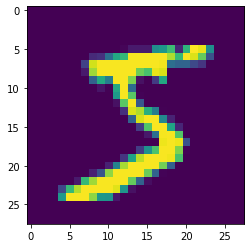

In [15]:
# 데이터 확인
plt.imshow(X_train[0])

In [18]:
# 훈련셋에서 검증셋 분리 (X_train, Y_train)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [ ]:
# 훈련셋 - model이 학습할 때 사용
X_train
Y_train
# 검증셋 - model이 학습할 때 사용
X_val
Y_val
# 테스트셋 - 모델 평가할 때 사용
X_test
Y_test

In [19]:
# normalize 하기 위해 색상값으로 나눔
X_train = X_train.reshape(50000,784).astype('float')/255.0
X_val = X_val.reshape(10000,784).astype('float')/255.0
X_test = X_test.reshape(10000,784).astype('float')/255.0

In [23]:
# 데이터가 많아 시간상 매우오래 걸릴 수 있음.
# 훈련셋과 검증셋700개,300개씩만 가져옴.
train_rand_idx = np.random.choice(50000,700)
val_rand_idx = np.random.choice(10000,300)

X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]

In [27]:
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train) # 자동으로 해준다
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

In [29]:
# 2. 모델 구성하기
model = Sequential()
# 2단레이어 구조로 deeplearning
model.add(Dense(units=2,input_dim=784,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

# 3. 모델 학습과정
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# 4. 학습
hist = model.fit(X_train,Y_train,epochs=1000,batch_size=10,validation_data=(X_val,Y_val))
# validation_data로 과적합 발생률을 줄여준다.


Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.3061 - accuracy: 0.1400 - val_loss: 2.2402 - val_accuracy: 0.2000
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2293 - accuracy: 0.1739 - val_loss: 2.1825 - val_accuracy: 0.2567
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1838 - accuracy: 0.2288 - val_loss: 2.1341 - val_accuracy: 0.2567
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1000 - accuracy: 0.2449 - val_loss: 2.0950 - val_accuracy: 0.2633
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0965 - accuracy: 0.2490 - val_loss: 2.0527 - val_accuracy: 0.2700
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0589 - accuracy: 0.2497 - val_loss: 2.0165 - val_accuracy: 0.2700
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0205 - accuracy: 0.2775 - val_loss: 1.9940 - val_accuracy: 0.2733
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 1.0914 - accuracy: 0.6285 - val_loss: 1.3959 - val_accuracy: 0.4967
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1046 - accuracy: 0.6007 - val_loss: 1.3989 - val_accuracy: 0.4767
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.1050 - accuracy: 0.6052 - val_loss: 1.4032 - val_accuracy: 0.4933
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0914 - accuracy: 0.6347 - val_loss: 1.4026 - val_accuracy: 0.5000
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0704 - accuracy: 0.6349 - val_loss: 1.3987 - val_accuracy: 0.4967
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0612 - accuracy: 0.6106 - val_loss: 1.4020 - val_accuracy: 0.4900
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.0892 - accuracy: 0.6357 - val_loss: 1.4039 - val_accuracy: 0.4900
Epoch 1

Epoch 172/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9911 - accuracy: 0.6772 - val_loss: 1.4526 - val_accuracy: 0.4833
Epoch 173/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9839 - accuracy: 0.6623 - val_loss: 1.4529 - val_accuracy: 0.4767
Epoch 174/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9715 - accuracy: 0.6835 - val_loss: 1.4568 - val_accuracy: 0.4800
Epoch 175/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9571 - accuracy: 0.7125 - val_loss: 1.4508 - val_accuracy: 0.4833
Epoch 176/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8963 - accuracy: 0.7032 - val_loss: 1.4603 - val_accuracy: 0.4800
Epoch 177/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9555 - accuracy: 0.6689 - val_loss: 1.4619 - val_accuracy: 0.4800
Epoch 178/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9995 - accuracy: 0.6695 - val_loss: 1.4571 - val_accuracy:

Epoch 229/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8963 - accuracy: 0.7312 - val_loss: 1.5368 - val_accuracy: 0.4533
Epoch 230/1000
70/70 [==============================] - 0s 969us/step - loss: 0.9033 - accuracy: 0.7087 - val_loss: 1.5397 - val_accuracy: 0.4533
Epoch 231/1000
70/70 [==============================] - 0s 997us/step - loss: 0.8621 - accuracy: 0.7140 - val_loss: 1.5479 - val_accuracy: 0.4500
Epoch 232/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8768 - accuracy: 0.7386 - val_loss: 1.5474 - val_accuracy: 0.4533
Epoch 233/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9138 - accuracy: 0.6908 - val_loss: 1.5601 - val_accuracy: 0.4533
Epoch 234/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8836 - accuracy: 0.7098 - val_loss: 1.5446 - val_accuracy: 0.4533
Epoch 235/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8613 - accuracy: 0.7331 - val_loss: 1.5415 - val_accur

Epoch 286/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7887 - accuracy: 0.7627 - val_loss: 1.6396 - val_accuracy: 0.4500
Epoch 287/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8402 - accuracy: 0.7513 - val_loss: 1.6352 - val_accuracy: 0.4667
Epoch 288/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8143 - accuracy: 0.7362 - val_loss: 1.6312 - val_accuracy: 0.4700
Epoch 289/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8408 - accuracy: 0.7309 - val_loss: 1.6473 - val_accuracy: 0.4467
Epoch 290/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7884 - accuracy: 0.7727 - val_loss: 1.6454 - val_accuracy: 0.4533
Epoch 291/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8287 - accuracy: 0.7539 - val_loss: 1.6529 - val_accuracy: 0.4600
Epoch 292/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8270 - accuracy: 0.7394 - val_loss: 1.6398 - val_accuracy:

Epoch 343/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7454 - accuracy: 0.7762 - val_loss: 1.7298 - val_accuracy: 0.4500
Epoch 344/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7484 - accuracy: 0.7648 - val_loss: 1.7441 - val_accuracy: 0.4500
Epoch 345/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7905 - accuracy: 0.7839 - val_loss: 1.7490 - val_accuracy: 0.4600
Epoch 346/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7346 - accuracy: 0.7842 - val_loss: 1.7472 - val_accuracy: 0.4500
Epoch 347/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7643 - accuracy: 0.8029 - val_loss: 1.7686 - val_accuracy: 0.4500
Epoch 348/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.8048 - accuracy: 0.7685 - val_loss: 1.7460 - val_accuracy: 0.4500
Epoch 349/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7537 - accuracy: 0.7913 - val_loss: 1.7735 - val_accuracy:

Epoch 400/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.8126 - val_loss: 1.8487 - val_accuracy: 0.4467
Epoch 401/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7447 - accuracy: 0.7795 - val_loss: 1.8641 - val_accuracy: 0.4467
Epoch 402/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7384 - accuracy: 0.7794 - val_loss: 1.8694 - val_accuracy: 0.4433
Epoch 403/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7520 - accuracy: 0.7769 - val_loss: 1.8533 - val_accuracy: 0.4467
Epoch 404/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.8151 - val_loss: 1.8704 - val_accuracy: 0.4567
Epoch 405/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7506 - accuracy: 0.7817 - val_loss: 1.8554 - val_accuracy: 0.4433
Epoch 406/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7063 - accuracy: 0.8106 - val_loss: 1.9004 - val_accuracy:

Epoch 457/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7374 - accuracy: 0.7879 - val_loss: 1.9885 - val_accuracy: 0.4500
Epoch 458/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.8099 - val_loss: 1.9709 - val_accuracy: 0.4533
Epoch 459/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.8180 - val_loss: 1.9898 - val_accuracy: 0.4500
Epoch 460/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7067 - accuracy: 0.7879 - val_loss: 1.9761 - val_accuracy: 0.4533
Epoch 461/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6999 - accuracy: 0.8121 - val_loss: 1.9706 - val_accuracy: 0.4500
Epoch 462/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6972 - accuracy: 0.7827 - val_loss: 1.9909 - val_accuracy: 0.4500
Epoch 463/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7411 - accuracy: 0.7927 - val_loss: 1.9728 - val_accuracy:

Epoch 514/1000
70/70 [==============================] - 0s 983us/step - loss: 0.6713 - accuracy: 0.7895 - val_loss: 2.0565 - val_accuracy: 0.4433
Epoch 515/1000
70/70 [==============================] - 0s 978us/step - loss: 0.7044 - accuracy: 0.7925 - val_loss: 2.0560 - val_accuracy: 0.4467
Epoch 516/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.8039 - val_loss: 2.0664 - val_accuracy: 0.4467
Epoch 517/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6669 - accuracy: 0.8043 - val_loss: 2.0689 - val_accuracy: 0.4533
Epoch 518/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.7135 - accuracy: 0.7906 - val_loss: 2.0762 - val_accuracy: 0.4467
Epoch 519/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6685 - accuracy: 0.8264 - val_loss: 2.0638 - val_accuracy: 0.4433
Epoch 520/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.8113 - val_loss: 2.0707 - val_accur

Epoch 571/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.8177 - val_loss: 2.1580 - val_accuracy: 0.4400
Epoch 572/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6815 - accuracy: 0.7990 - val_loss: 2.1556 - val_accuracy: 0.4367
Epoch 573/1000
70/70 [==============================] - 0s 979us/step - loss: 0.6651 - accuracy: 0.7840 - val_loss: 2.1692 - val_accuracy: 0.4367
Epoch 574/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.8033 - val_loss: 2.1699 - val_accuracy: 0.4400
Epoch 575/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6116 - accuracy: 0.8321 - val_loss: 2.1702 - val_accuracy: 0.4433
Epoch 576/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6518 - accuracy: 0.8035 - val_loss: 2.1930 - val_accuracy: 0.4467
Epoch 577/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6368 - accuracy: 0.8080 - val_loss: 2.1769 - val_accurac

Epoch 628/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.8072 - val_loss: 2.2440 - val_accuracy: 0.4400
Epoch 629/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.8096 - val_loss: 2.2718 - val_accuracy: 0.4433
Epoch 630/1000
70/70 [==============================] - 0s 977us/step - loss: 0.6483 - accuracy: 0.8026 - val_loss: 2.2657 - val_accuracy: 0.4367
Epoch 631/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6788 - accuracy: 0.7830 - val_loss: 2.2829 - val_accuracy: 0.4300
Epoch 632/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6520 - accuracy: 0.8267 - val_loss: 2.2613 - val_accuracy: 0.4367
Epoch 633/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.8178 - val_loss: 2.2673 - val_accuracy: 0.4400
Epoch 634/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6348 - accuracy: 0.8071 - val_loss: 2.2637 - val_accurac

Epoch 685/1000
70/70 [==============================] - 0s 987us/step - loss: 0.5940 - accuracy: 0.8248 - val_loss: 2.3547 - val_accuracy: 0.4167
Epoch 686/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6039 - accuracy: 0.8271 - val_loss: 2.3367 - val_accuracy: 0.4400
Epoch 687/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.8297 - val_loss: 2.3362 - val_accuracy: 0.4267
Epoch 688/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.8086 - val_loss: 2.3649 - val_accuracy: 0.4200
Epoch 689/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.8330 - val_loss: 2.3529 - val_accuracy: 0.4200
Epoch 690/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5688 - accuracy: 0.8302 - val_loss: 2.3409 - val_accuracy: 0.4433
Epoch 691/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6262 - accuracy: 0.8192 - val_loss: 2.3550 - val_accurac

Epoch 742/1000
70/70 [==============================] - 0s 972us/step - loss: 0.5598 - accuracy: 0.8290 - val_loss: 2.4036 - val_accuracy: 0.4367
Epoch 743/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5563 - accuracy: 0.8486 - val_loss: 2.4465 - val_accuracy: 0.4300
Epoch 744/1000
70/70 [==============================] - 0s 982us/step - loss: 0.5673 - accuracy: 0.8375 - val_loss: 2.4337 - val_accuracy: 0.4167
Epoch 745/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5890 - accuracy: 0.8239 - val_loss: 2.4294 - val_accuracy: 0.4433
Epoch 746/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.8141 - val_loss: 2.4636 - val_accuracy: 0.4167
Epoch 747/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.8315 - val_loss: 2.4394 - val_accuracy: 0.4367
Epoch 748/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.8338 - val_loss: 2.4459 - val_accur

Epoch 799/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.8117 - val_loss: 2.5325 - val_accuracy: 0.4200
Epoch 800/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5487 - accuracy: 0.8344 - val_loss: 2.5125 - val_accuracy: 0.4267
Epoch 801/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4979 - accuracy: 0.8629 - val_loss: 2.5166 - val_accuracy: 0.4367
Epoch 802/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.8388 - val_loss: 2.5211 - val_accuracy: 0.4233
Epoch 803/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5621 - accuracy: 0.8322 - val_loss: 2.5653 - val_accuracy: 0.4133
Epoch 804/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.6242 - accuracy: 0.8208 - val_loss: 2.5250 - val_accuracy: 0.4233
Epoch 805/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5567 - accuracy: 0.8446 - val_loss: 2.5497 - val_accuracy:

Epoch 856/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5907 - accuracy: 0.8247 - val_loss: 2.5919 - val_accuracy: 0.4233
Epoch 857/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.8413 - val_loss: 2.6020 - val_accuracy: 0.4200
Epoch 858/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5242 - accuracy: 0.8520 - val_loss: 2.6312 - val_accuracy: 0.4233
Epoch 859/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5587 - accuracy: 0.8425 - val_loss: 2.6110 - val_accuracy: 0.4233
Epoch 860/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.8149 - val_loss: 2.6064 - val_accuracy: 0.4233
Epoch 861/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5385 - accuracy: 0.8342 - val_loss: 2.6349 - val_accuracy: 0.4233
Epoch 862/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.8414 - val_loss: 2.5971 - val_accuracy:

Epoch 913/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4921 - accuracy: 0.8582 - val_loss: 2.7004 - val_accuracy: 0.4133
Epoch 914/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5502 - accuracy: 0.8498 - val_loss: 2.7273 - val_accuracy: 0.4167
Epoch 915/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5129 - accuracy: 0.8430 - val_loss: 2.6809 - val_accuracy: 0.4133
Epoch 916/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5635 - accuracy: 0.8386 - val_loss: 2.6868 - val_accuracy: 0.4200
Epoch 917/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.8601 - val_loss: 2.7236 - val_accuracy: 0.4200
Epoch 918/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5382 - accuracy: 0.8506 - val_loss: 2.6830 - val_accuracy: 0.4200
Epoch 919/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5732 - accuracy: 0.8325 - val_loss: 2.7032 - val_accuracy:

Epoch 970/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5642 - accuracy: 0.8161 - val_loss: 2.7726 - val_accuracy: 0.4200
Epoch 971/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.8410 - val_loss: 2.7924 - val_accuracy: 0.4167
Epoch 972/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.8488 - val_loss: 2.7854 - val_accuracy: 0.4100
Epoch 973/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5697 - accuracy: 0.8281 - val_loss: 2.7780 - val_accuracy: 0.4167
Epoch 974/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.8327 - val_loss: 2.7823 - val_accuracy: 0.4233
Epoch 975/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8564 - val_loss: 2.8012 - val_accuracy: 0.4133
Epoch 976/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.5445 - accuracy: 0.8299 - val_loss: 2.8108 - val_accuracy:

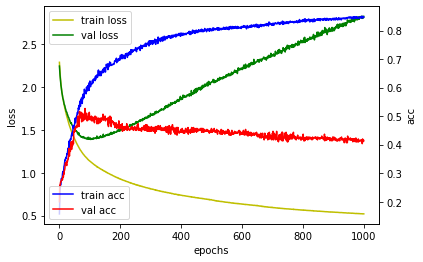

In [37]:
# 5. 모델학습과정을 표시하고 평가하기
# val_acc가 중요함
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축 공유 하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [38]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=32)

313/313 [==============================] - 0s 961us/step - loss: 2.6408 - accuracy: 0.4840


In [40]:
print('loss: ',loss_and_metrics[0])
print('accuracy : ',loss_and_metrics[1])

loss:  2.6407930850982666
accuracy :  0.48399999737739563


In [44]:
# 6. 모델저장 및 로드
# 저장
model.save('model/mnist.h5')
           
# 로드
from tensorflow.keras.models import load_model
model2 = load_model('model/mnist.h5')

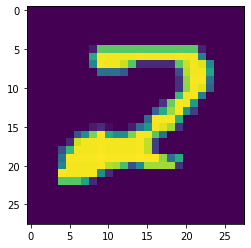

In [46]:
plt.imshow(X_train[3].reshape(28,28))

In [50]:
result = model2.predict(X_train[3].reshape(1,784)).argmax()
result

2

In [53]:
Y_train[3].argmax()

2

In [58]:
model2.predict_classes(X_val[0].reshape(1,784))

array([1], dtype=int64)

# 1. 콜백함수

In [5]:
class CustomHistory(tf.keras.callbacks.Callback):
    def __init__(self):
        self.epoch = 0
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self,batch,logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        if self.epoch % 10 == 0:
            print('epoch : {}, loss : {}, val_loss : {}, acc : {}, val_acc : {}'.format(self.epoch,logs.get('loss'),logs.get('val_loss'),logs.get('accuracy'),logs.get('val_accuracy')))
        self.epoch +=1

# 1. 데이터 셋 준비하기
# 훈련셋, 테스트셋 분리. 보통 7:3으로 분류
(X_train,Y_train),(X_test,Y_test) = mnist.load_data() # mnist 분리
# 훈련셋에서 검증셋 분리 (X_train, Y_train)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눔
X_train = X_train.reshape(50000,784).astype('float')/255.0
X_val = X_val.reshape(10000,784).astype('float')/255.0
X_test = X_test.reshape(10000,784).astype('float')/255.0
# 데이터가 많아 시간상 매우오래 걸릴 수 있음.
# 훈련셋과 검증셋700개,300개씩만 가져옴.
train_rand_idx = np.random.choice(50000,700)
val_rand_idx = np.random.choice(10000,300)
X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train) # 자동으로 해준다
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
# 2단레이어 구조로 deeplearning
model.add(Dense(units=2,input_dim=784,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

# 3. 모델 학습과정
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# 4. 학습
cus_his = CustomHistory()
hist = model.fit(X_train,Y_train,epochs=1000,batch_size=10,validation_data=(X_val,Y_val),verbose=0,
                 callbacks=[cus_his])
# validation_data로 과적합 발생률을 줄여준다.
# 콜백함수에서 accuracy 프린트해주기 때문에 verbose는 0
# callbacks에는 CustomHistory() 객체를 넣어준다.

epoch : 0, loss : 2.2870070934295654, val_loss : 2.2355408668518066, acc : 0.14142857491970062, val_acc : 0.15333333611488342
epoch : 10, loss : 1.708188772201538, val_loss : 1.7047215700149536, acc : 0.4000000059604645, val_acc : 0.4166666567325592
epoch : 20, loss : 1.4816445112228394, val_loss : 1.5323421955108643, acc : 0.48571428656578064, val_acc : 0.4566666781902313
epoch : 30, loss : 1.352245569229126, val_loss : 1.4311578273773193, acc : 0.550000011920929, val_acc : 0.47333332896232605
epoch : 40, loss : 1.2567483186721802, val_loss : 1.3767914772033691, acc : 0.5871428847312927, val_acc : 0.49666666984558105
epoch : 50, loss : 1.187603235244751, val_loss : 1.3332966566085815, acc : 0.6028571724891663, val_acc : 0.5199999809265137
epoch : 60, loss : 1.1314783096313477, val_loss : 1.3037102222442627, acc : 0.6257143020629883, val_acc : 0.5133333206176758
epoch : 70, loss : 1.086045265197754, val_loss : 1.2878608703613281, acc : 0.6257143020629883, val_acc : 0.5233333110809326
e

epoch : 660, loss : 0.5992796421051025, val_loss : 1.7777477502822876, acc : 0.7928571701049805, val_acc : 0.49000000953674316
epoch : 670, loss : 0.5964441895484924, val_loss : 1.7769348621368408, acc : 0.7942857146263123, val_acc : 0.49000000953674316
epoch : 680, loss : 0.593474268913269, val_loss : 1.8122886419296265, acc : 0.7985714077949524, val_acc : 0.49000000953674316
epoch : 690, loss : 0.5915572047233582, val_loss : 1.8212153911590576, acc : 0.8042857050895691, val_acc : 0.4866666793823242
epoch : 700, loss : 0.5892757773399353, val_loss : 1.8357800245285034, acc : 0.8071428537368774, val_acc : 0.47999998927116394
epoch : 710, loss : 0.5856098532676697, val_loss : 1.8533538579940796, acc : 0.8042857050895691, val_acc : 0.47999998927116394
epoch : 720, loss : 0.5848721265792847, val_loss : 1.859802007675171, acc : 0.8057143092155457, val_acc : 0.4866666793823242
epoch : 730, loss : 0.5812816619873047, val_loss : 1.865067720413208, acc : 0.808571457862854, val_acc : 0.47999998

# 2. early stopping
- val_loss값이 늘어나면 epoch를 다 수행하지 않고 조기 종료

In [10]:
# 1. 데이터 셋 준비하기
# 훈련셋, 테스트셋 분리. 보통 7:3으로 분류
(X_train,Y_train),(X_test,Y_test) = mnist.load_data() # mnist 분리
# 훈련셋에서 검증셋 분리 (X_train, Y_train)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눔
X_train = X_train.reshape(50000,784).astype('float')/255.0
X_val = X_val.reshape(10000,784).astype('float')/255.0
X_test = X_test.reshape(10000,784).astype('float')/255.0
# 데이터가 많아 시간상 매우오래 걸릴 수 있음.
# 훈련셋과 검증셋700개,300개씩만 가져옴.
train_rand_idx = np.random.choice(50000,700)
val_rand_idx = np.random.choice(10000,300)
X_train = X_train[train_rand_idx]
Y_train = Y_train[train_rand_idx]
X_val = X_val[val_rand_idx]
Y_val = Y_val[val_rand_idx]
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train) # 자동으로 해준다
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
# 2단레이어 구조로 deeplearning
model.add(Dense(units=2,input_dim=784,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

# 3. 모델 학습과정
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# 4. 학습
from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping() # 성급한 조기종료( 1번이라도 val_loss가 커지면 종료)
early_stop = EarlyStopping(patience=30) # patience 인자 수만큼 loss가 올라도 진행
hist = model.fit(X_train,Y_train,epochs=1000,batch_size=10,validation_data=(X_val,Y_val),verbose=1,
                 callbacks=[early_stop])
# validation_data로 과적합 발생률을 줄여준다.
# early_stop 객체를 callbaks에 넣어준다

Epoch 1/1000
70/70 [==============================] - 0s 3ms/step - loss: 2.2907 - accuracy: 0.1695 - val_loss: 2.2485 - val_accuracy: 0.2167
Epoch 2/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.2263 - accuracy: 0.2330 - val_loss: 2.1772 - val_accuracy: 0.2533
Epoch 3/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.1513 - accuracy: 0.2556 - val_loss: 2.1072 - val_accuracy: 0.2767
Epoch 4/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0823 - accuracy: 0.2749 - val_loss: 2.0430 - val_accuracy: 0.2767
Epoch 5/1000
70/70 [==============================] - 0s 1ms/step - loss: 2.0042 - accuracy: 0.2820 - val_loss: 1.9993 - val_accuracy: 0.2767
Epoch 6/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9435 - accuracy: 0.2758 - val_loss: 1.9638 - val_accuracy: 0.2833
Epoch 7/1000
70/70 [==============================] - 0s 1ms/step - loss: 1.9277 - accuracy: 0.3263 - val_loss: 1.9273 - val_accuracy: 0.2900
Epoch 

70/70 [==============================] - 0s 1ms/step - loss: 0.9669 - accuracy: 0.6714 - val_loss: 1.3611 - val_accuracy: 0.5367
Epoch 116/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9443 - accuracy: 0.6721 - val_loss: 1.3640 - val_accuracy: 0.5367
Epoch 117/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9505 - accuracy: 0.6895 - val_loss: 1.3599 - val_accuracy: 0.5533
Epoch 118/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9208 - accuracy: 0.6907 - val_loss: 1.3632 - val_accuracy: 0.5367
Epoch 119/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9537 - accuracy: 0.6667 - val_loss: 1.3642 - val_accuracy: 0.5433
Epoch 120/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9468 - accuracy: 0.6901 - val_loss: 1.3866 - val_accuracy: 0.5400
Epoch 121/1000
70/70 [==============================] - 0s 1ms/step - loss: 0.9495 - accuracy: 0.6851 - val_loss: 1.3655 - val_accuracy: 0.5467
Epoch 1

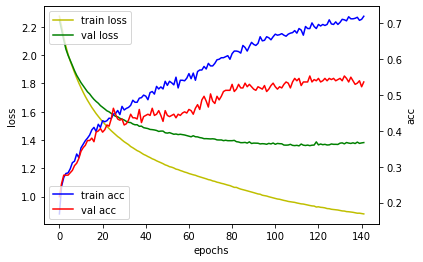

In [11]:
# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축 공유 하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [13]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=10)

1000/1000 [==============================] - 1s 489us/step - loss: 1.3285 - accuracy: 0.5581


In [33]:
# 7. 모델 사용하기
idx = np.random.choice(X_test.shape[0],5)
xhat = X_test[idx]
yhat = model.predict(xhat)
yhat = np.argmax(yhat,axis=1)

In [34]:
# 예측치
yhat 

array([3, 4, 9, 3, 5], dtype=int64)

In [35]:
# 실제값
np.argmax(Y_test[idx],axis=1)

array([2, 4, 4, 3, 5], dtype=int64)

In [37]:
for i in range(5):
    print(i,'번째 실제값 : ',np.argmax(Y_test[idx][i]),'\t예측값 : ',yhat[i])

0 번째 실제값 :  2 	예측값 :  3
1 번째 실제값 :  4 	예측값 :  4
2 번째 실제값 :  4 	예측값 :  9
3 번째 실제값 :  3 	예측값 :  3
4 번째 실제값 :  5 	예측값 :  5


In [30]:
# 8. 모델 저장하기
model.save('model/mnist.h5')

In [32]:
# 9. 모델 재사용하기
from tensorflow.keras.models import load_model
model12 = load_model('model/mnist.h5')
model12.predict_classes(xhat)

D:\kks\IDE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 6, 3, 8, 4], dtype=int64)

# 3. 위 모델(DNN)의 accuracy 늘리기
<ol>
    <li> 데이터 확보 </li>
    <li> layer </li>
    <li> 활성화 함수 : relu(은닉층에 사용), sigommid, softmax(output layer에서 사용)</li>
    <li> optimizer, epoch 등을 조정</li>
</ol>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.utils as utils
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# 1. 데이터 셋 준비하기
# 훈련셋, 테스트셋 분리. 보통 7:3으로 분류
(X_train,Y_train),(X_test,Y_test) = mnist.load_data() # mnist 분리
# 훈련셋에서 검증셋 분리 (X_train, Y_train)
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# normalize 하기 위해 색상값으로 나눔
X_train = X_train.reshape(50000,784).astype('float')/255.0
X_val = X_val.reshape(10000,784).astype('float')/255.0
X_test = X_test.reshape(10000,784).astype('float')/255.0
# 데이터가 많아 시간상 매우오래 걸릴 수 있음.
# 원 핫 인코딩 = 라벨링 전환 
Y_train = utils.to_categorical(Y_train) # 자동으로 해준다
Y_val = utils.to_categorical(Y_val)
Y_test = utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
# 2단레이어 구조로 deeplearning
model.add(Dense(units=1024,input_dim=784,activation='relu'))
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

# 3. 모델 학습과정
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

# 4. 학습
from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping() # 성급한 조기종료( 1번이라도 val_loss가 커지면 종료)
early_stop = EarlyStopping(patience=4) # patience 인자 수만큼 loss가 올라도 진행
hist = model.fit(X_train,Y_train,epochs=20,batch_size=10,validation_data=(X_val,Y_val),verbose=1,
                 callbacks=[early_stop])
# validation_data로 과적합 발생률을 줄여준다.
# early_stop 객체를 callbaks에 넣어준다

Epoch 1/20
5000/5000 [==============================] - 32s 6ms/step - loss: 0.8224 - accuracy: 0.7375 - val_loss: 0.1638 - val_accuracy: 0.9529
Epoch 2/20
5000/5000 [==============================] - 30s 6ms/step - loss: 0.1349 - accuracy: 0.9594 - val_loss: 0.1127 - val_accuracy: 0.9678
Epoch 3/20
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.0880 - val_accuracy: 0.9733
Epoch 4/20
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0519 - accuracy: 0.9850 - val_loss: 0.0966 - val_accuracy: 0.9728
Epoch 5/20
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0355 - accuracy: 0.9895 - val_loss: 0.0863 - val_accuracy: 0.9750
Epoch 6/20
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0245 - accuracy: 0.9930 - val_loss: 0.0954 - val_accuracy: 0.9760
Epoch 7/20
5000/5000 [==============================] - 30s 6ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0937 - val_ac

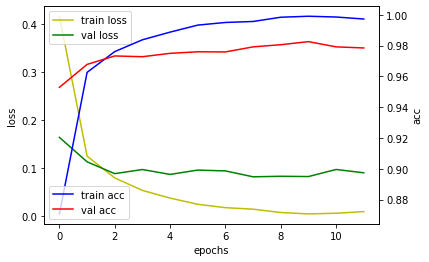

In [21]:
# 5. 모델학습과정을 표시하고 평가하기
fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'g',label='val loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax = loss_ax.twinx() # x축 공유 하는 acc_ax
acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val acc')
acc_ax.set_ylabel('acc')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [22]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test,Y_test,batch_size=10)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0964 - accuracy: 0.9774


In [23]:
# 7. 모델 사용하기
idx = np.random.choice(X_test.shape[0],5)
xhat = X_test[idx]
yhat = model.predict(xhat)
yhat = np.argmax(yhat,axis=1)
for i in range(5):
    print(i,'번째 실제값 : ',np.argmax(Y_test[idx][i]),'\t예측값 : ',yhat[i])

0 번째 실제값 :  1 	예측값 :  1
1 번째 실제값 :  5 	예측값 :  5
2 번째 실제값 :  4 	예측값 :  4
3 번째 실제값 :  4 	예측값 :  4
4 번째 실제값 :  6 	예측값 :  6


In [18]:
# 8. 모델 저장하기
model.save('model/mnist_v2.h5')

In [19]:
# 9. 모델 재사용
from tensorflow.keras.models import load_model
model12 = load_model('model/mnist_v2.h5')
model12.predict_classes(xhat)

D:\kks\IDE\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 9, 3, 4, 4], dtype=int64)